In [41]:
from ising.lattices import square_random_lattice
import ising.checkerboard as checkerboard
import ising.metropolis as metropolis
from ising.visualize import lattices_to_images, upscale_lattices, display_experiment, save_gif
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.ndimage import convolve
import ising.plot_styling

In [9]:
def calculate_hamiltonian(lattice: checkerboard.SquareLattice,
    J: checkerboard.InteractionStrength,
    h: checkerboard.MagneticField,
    N,
    M):
    """Compute the energy of a lattice."""
    
    kernel = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]])
    neighbours_lattice = convolve(lattice, kernel, mode="wrap")

    return np.sum((neighbours_lattice * J  + h)*lattice)

Generate new data

In [10]:
N, M = 20,20

TEMP_STEPS = 50
STEPS_PER_SIM = 20
SIMS_PER_TEMP = 5
T_start = 1.8
T_end = 2.8
temps = np.linspace(T_start, T_end, TEMP_STEPS)

J = 1
h = 0

lattice = square_random_lattice(N, M, states=[-1, 1])

In [15]:
hamiltonians = np.zeros((TEMP_STEPS, SIMS_PER_TEMP))

for i in range(TEMP_STEPS):
    T = temps[i]
    for j in range(SIMS_PER_TEMP):
        hamiltonians[i][j] = np.sum(calculate_hamiltonian(
            checkerboard.simulate(lattice.copy(), J=J, h=h, T=T, steps=STEPS_PER_SIM)[-1]
            ,J=J,h=h,N=N,M=M
        ))

In [31]:
meta = {
    "N": N,
    "M": M,
    "J": J,
    "h": h,
    "T_start": T_start,
    "T_end": T_end,
    "TEMP_STEPS": TEMP_STEPS,
    "STEPS_PER_SIM": STEPS_PER_SIM,
    "SIMS_PER_TEMP": SIMS_PER_TEMP,
}

np.savez("simulation-results/raw-hamiltonian-long3", meta=meta, hamiltonians=hamiltonians)
meta

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Load data

In [33]:
hamiltonians = np.load("simulation-results/raw-hamiltonian-long.npy")
# b = loaded_file['meta']
# hamiltonians = loaded_file['hamiltonians']

Compute Cv and visualize

Text(0, 0.5, 'Specific heat capacity')

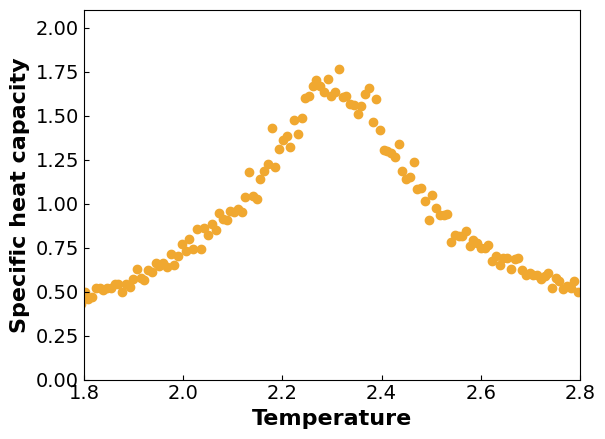

In [43]:
TEMP_STEPS = 200
T_start = 1.5
T_end = 3
temps = np.linspace(T_start, T_end, TEMP_STEPS)

C = np.empty(TEMP_STEPS)
for i in range(TEMP_STEPS):
    T = temps[i]

    C[i] = np.var(hamiltonians[i]/T)/(M*N)

plt.scatter(temps, C)
plt.xlim(1.8, 2.8)
plt.ylim(0,2.1)
plt.xlabel("Temperature")
plt.ylabel("Specific heat capacity")